# Tilapia Regression Model with SARIMA
By Miguel Andre R. Pajarillo

## Load the Dataset

In [1]:
import pandas as pd

In [2]:
Tilapia_UN = pd.read_csv('./data/tilapia_UN_tilapia_UN.csv.csv')

In [3]:
Tilapia_DA = pd.read_csv('./data/tilapia_DA_tilapia_DA.csv.csv')

In [4]:
Tilapia_UN

,cm_id,cm_name,um_id,um_name,mp_month,mp_year,mp_price
0,405,Fish (tilapia) - Retail,5,KG,5,2020,138.31
1,405,Fish (tilapia) - Retail,5,KG,5,2020,139.38
2,405,Fish (tilapia) - Retail,5,KG,5,2020,150.00
3,405,Fish (tilapia) - Retail,5,KG,5,2020,128.15
4,405,Fish (tilapia) - Retail,5,KG,5,2020,165.00
...,...,...,...,...,...,...,...
1049,405,Fish (tilapia) - Retail,5,KG,6,2021,113.75
1050,405,Fish (tilapia) - Retail,5,KG,6,2021,150.00
1051,405,Fish (tilapia) - Retail,5,KG,6,2021,142.50
1052,405,Fish (tilapia) - Retail,5,KG,6,2021,146.88


In [5]:
Tilapia_DA.head()

,cm_id,cm_name,um_id,um_name,mp_month,mp_year,mp_price
0,NaN,Fish (tilapia) - Retail,NaN,KG,1,2022,122.97
1,NaN,Fish (tilapia) - Retail,NaN,KG,2,2022,121.40
2,NaN,Fish (tilapia) - Retail,NaN,KG,3,2022,120.10
3,NaN,Fish (tilapia) - Retail,NaN,KG,4,2022,120.05
4,NaN,Fish (tilapia) - Retail,NaN,KG,5,2022,121.83


## Extract Necessary Columns (Date and Price)

### UN World Food Programme

In [6]:
Tilapia_UN['date'] = pd.to_datetime(
    Tilapia_UN.rename(columns={'mp_year': 'year', 'mp_month': 'month'})[['year', 'month']].assign(day=15)
)

In [7]:
Tilapia_UN = Tilapia_UN.drop(columns=['cm_id', 'cm_name', 'um_id', 'um_name', 'mp_month', 'mp_year'])

In [8]:
Tilapia_UN.head()

,mp_price,date
0,138.31,2020-05-15
1,139.38,2020-05-15
2,150.00,2020-05-15
3,128.15,2020-05-15
4,165.00,2020-05-15


### DA Bantay Presyo

In [9]:
Tilapia_DA['date'] = pd.to_datetime(
    Tilapia_DA.rename(columns={'mp_year': 'year', 'mp_month': 'month'})[['year', 'month']].assign(day=15)
)

In [10]:
Tilapia_DA = Tilapia_DA.drop(columns=['cm_id', 'cm_name', 'um_id', 'um_name', 'mp_month', 'mp_year'])

In [11]:
Tilapia_DA.head()

,mp_price,date
0,122.97,2022-01-15
1,121.40,2022-02-15
2,120.10,2022-03-15
3,120.05,2022-04-15
4,121.83,2022-05-15


In [12]:
import matplotlib.pyplot as plt

In [13]:
Tilapia = pd.concat([Tilapia_DA, Tilapia_UN])

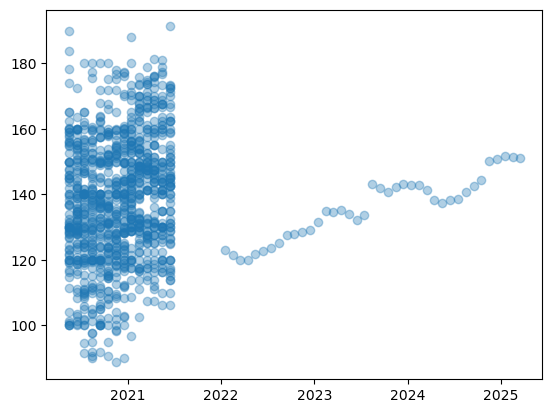

<Figure size 5000x600 with 0 Axes>

In [14]:
plt.scatter(Tilapia['date'], Tilapia['mp_price'], alpha=0.35)
plt.figure(figsize=(50, 6))
plt.show()

In [15]:
from datetime import datetime

In [16]:
# Set Date as the Inex
Tilapia = Tilapia.set_index('date')

In [17]:
# Aggregate samples to mean
Tilapia = Tilapia.resample('MS').mean()

In [18]:
Tilapia['mp_price'] = Tilapia['mp_price'].interpolate(method='linear')

In [23]:
start_date = datetime(2020,1,1)
end_date = datetime(2026,1,1)
lim_tilapia = Tilapia[start_date:end_date]

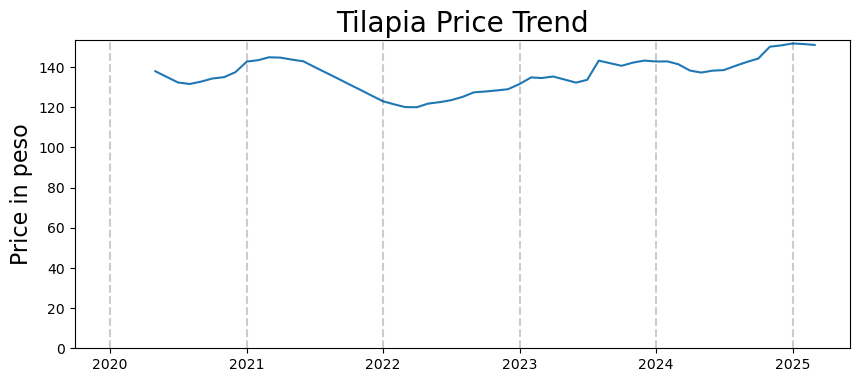

In [28]:
plt.figure(figsize=(10,4))
plt.plot(lim_tilapia)
plt.title('Tilapia Price Trend', fontsize=20)
plt.ylabel('Price in Peso', fontsize=16)
plt.ylim(bottom=0)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [29]:
## Remove the trend

In [30]:
first_diff = lim_tilapia.diff()[1:]

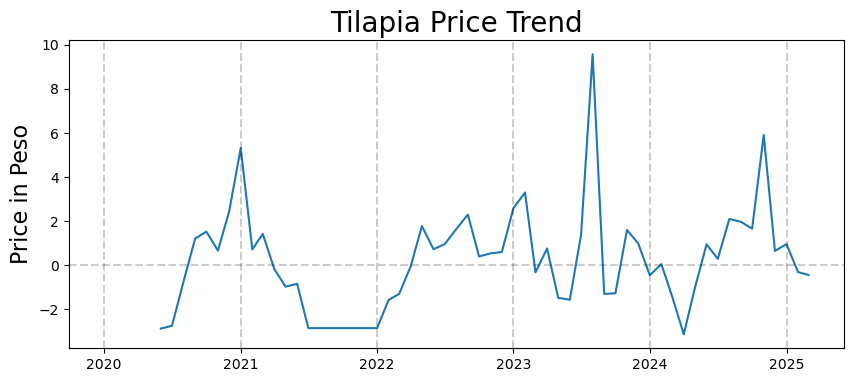

In [32]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Tilapia Price Trend', fontsize=20)
plt.ylabel('Price in Peso', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)